In [355]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from matplotlib import cm
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft
from scipy import io

np.random.seed(123)

In [356]:
class SimulatedIEEEMic:
    fdev = 15000
    fm = 3900

    def get_sig(self, N, fs, fc):
        n = np.arange(N)
        t = n / fs
        if fc is None:
            fc = fs / 4.
        ph0 = np.random.random() * 2. * np.pi
        ph = ph0 + 2.0 * np.pi * fc * t + self.fdev / self.fm * np.cos(
            2.0 * np.pi * self.fm * t)
        x = np.cos(ph)
        return x

    def get(self, N, fs, dB, fc=None):
        if dB is None:
            x = np.zeros(N)
        else:
            x = self.get_sig(N, fs, fc)
            x /= np.std(x)
            x *= 10.**(dB / 10.)
        return x

    def noise(self, N, dB):
        A = 10.**(dB / 20.)
        x = np.random.normal(loc=0, scale=A, size=N)
        return x

In [357]:
def round_power2(num):
    return int(np.power(2., np.ceil(np.log2(num))))


def signal_power(x):
    return np.var(x)
    return sum(abs(sig)**2.0)/N

def signal_power_dB(x):
    return 10. * np.log10(signal_power(x))


def snr(a, b):
    return signal_power(a) / signal_power(b)


def snr_dB(a, b):
    return 10. * np.log10(snr(a, b))

In [358]:
def mic_sig(n, fs, fc, fm, fd, dB=0.):
    t = np.arange(n) / fs
    x = np.exp(1.j *
               (2. * np.pi * fc * t + fd / fm * np.sin(2. * np.pi * fm * t)))
    x /= np.std(x)
    x *= 10.**(dB / 20.)
    return x

In [359]:
def awgn(n, dB=0.):
    w = 10.**(dB / 10.)
    d = stats.multivariate_normal(mean=[0., 0.],
                                  cov=[[.5 * w, 0.], [0., .5 * w]])
    x = d.rvs(size=n).view(np.complex128).reshape(N)
    return x

In [406]:
N = round_power2(1e5)
fs = int(1e6)
fc = int(2e5)
fd = 15000.
fm = 3900.

# mic1 = SimulatedIEEEMic()
# sig1 = mic1.get(N, fs, dB=0.)

sig = mic_sig(N, fs, fc=fc, fm=fm, fd=fd, dB=0.)
noise = awgn(N, dB=0.)
both = sig + noise

print('Signal power: %5.2f dB' % (signal_power_dB(sig)))
print('Noise power: %5.2f dB' % (signal_power_dB(noise)))
print('SNR: %5.2f dB' % (snr_dB(sig, noise)))

Signal power:  0.00 dB
Noise power:  0.02 dB
SNR: -0.02 dB


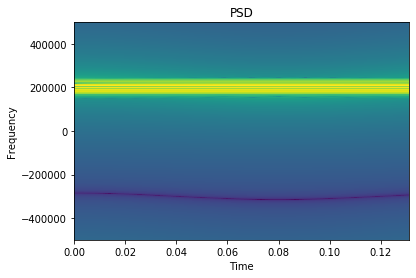

In [361]:
# Matplotlib Method

# plt.specgram(noise, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

plt.specgram(sig, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# plt.specgram(both, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

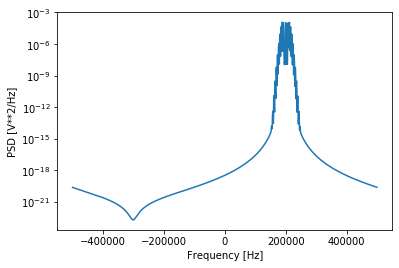

In [362]:
# Welch (Periodigram with averaging and overlap, which is currently 0)

# f, Pxx_den = signal.welch(noise, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

f, Pxx_den = signal.welch(sig, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# f, Pxx_den = signal.welch(both, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# Compute total power
# df = f[1] - f[0]
# np.sum(Pxx_den) * df

In [363]:
# Periodigram

# f, Pxx_den = signal.periodogram(noise, fs, window='hann', nfft=1024, scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# f, Pxx_den = signal.periodogram(sig, fs, window='hann', nfft=1024, scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# f, Pxx_den = signal.periodogram(both, fs, window='hann', nfft=1024, scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [364]:
def get_fft_psd(sig, fs, N):
    f = fft.fftshift(fft.fftfreq(N, 1. / fs))
    x = fft.fftshift(fft.fft(sig))
    x = np.abs(x)**2. / (N * fs)
    return f, x


def get_energy_from_psd(psd):
    return np.sum(psd)


def get_power_from_psd(psd, f):
    df = f[1] - f[0]
    return np.sum(psd) * df

Signal power in time 1.000000
Signal energy in time from signal power in time 0.131072
Signal energy in time 0.131072
Signal energy in freq 0.131072


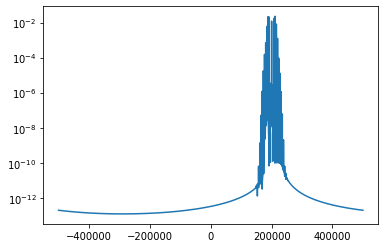

Signal energy from psd 0.131072
Signal power from psd 1.000000


In [365]:
f = fft.fftshift(fft.fftfreq(N, 1./fs))
x = fft.fftshift(fft.fft(sig))

power_sig_time = signal_power(sig)
energy_sig_time_from_power_sig_time = power_sig_time * N * 1./fs # where 1./fs=dt and T=(N*1./fs)
print('Signal power in time %8.6f' % (power_sig_time))
print('Signal energy in time from signal power in time %8.6f' % (energy_sig_time_from_power_sig_time))

energy_sig_time = np.sum(np.abs(sig)**2.) / fs
energy_sig_freq = np.sum(np.abs(x)**2.) / (N * fs)
print('Signal energy in time %8.6f' % (energy_sig_time))
print('Signal energy in freq %8.6f' % (energy_sig_freq))

f, psd = get_fft_psd(sig, fs, N)
plt.semilogy(f, psd)
plt.show()

print('Signal energy from psd %8.6f' % (get_energy_from_psd(psd)))
print('Signal power from psd %8.6f' % (get_power_from_psd(psd, f)))

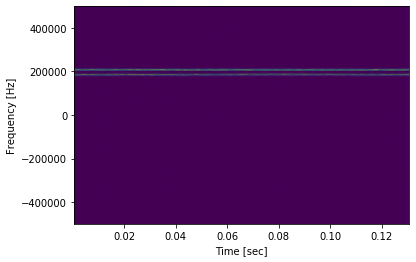

In [459]:
f, t, Sxx = signal.spectrogram(both, fs, return_onesided=False, window='boxcar', nperseg=1024, nfft=1024, noverlap=0, detrend=False, scaling='density', mode='psd')
plt.pcolormesh(t, fft.fftshift(f), fft.fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

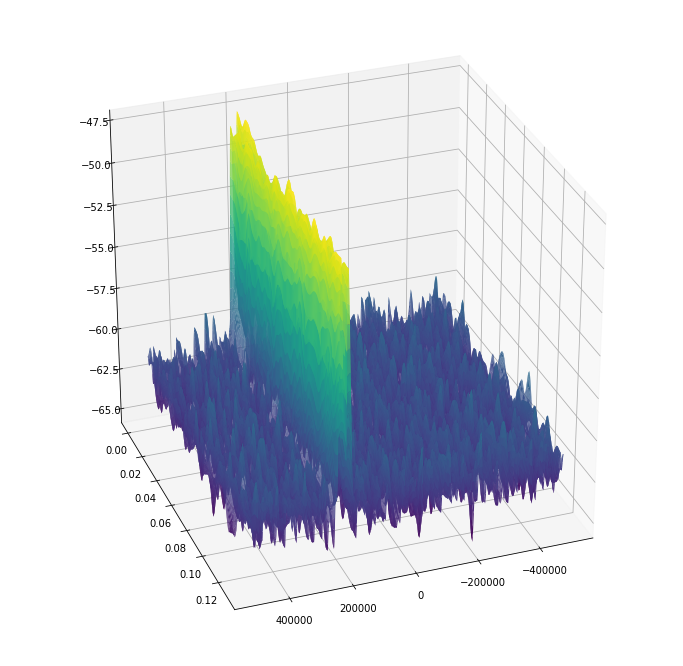

In [490]:
import scipy.ndimage

f, t, Sxx = signal.spectrogram(both, fs, return_onesided=False, window='hann', nperseg=1024, nfft=1024, noverlap=0, detrend=False, scaling='density', mode='psd')

def clip_2d(x, lim_min, lim_max):
    (x, y) = np.shape(Sxx)
    for i in range(x):
        for j in range(y):
            Sxx[i, j] = max(min(Sxx[i, j], lim_max), lim_min)
    return Sxx


f = fft.fftshift(f)
Sxx = fft.fftshift(Sxx, axes=0)
Sxx = 10.0*np.log10(Sxx)
Sxx = clip_2d(Sxx, -70, 0)

def smooth_2d(x, sigma):
    return scipy.ndimage.filters.gaussian_filter(x, [sigma, sigma], mode='mirror')

def crop_2d(Sxx, f, t, n):
    Sxx = Sxx[n:-n, n:-n]
    f = f[n:-n]
    t = t[n:-n]
    return Sxx, f, t

fig = plt.figure(figsize=(12,12))

Sxx = smooth_2d(Sxx, 2)
# Sxx, f, t = crop_2d(Sxx, f, t, 4)

ax = fig.gca(projection='3d')
# ax.get_proj=lambda: np.dot(mpl3d.axes3d.Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))
ax.plot_surface(f[:, None], t[None, :], Sxx, cmap='viridis', rstride=1, cstride=1, alpha=1, antialiased=True)
ax.view_init(elev=30, azim=70)
# plt.show()
plt.savefig('test.png')  

IndexError: index 128 is out of bounds for axis 1 with size 128

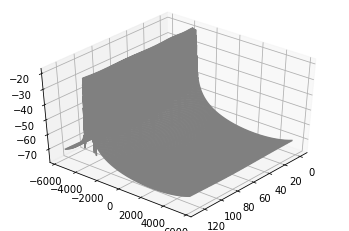

In [392]:
ax = plt.gca(projection='3d')

for i in range(0, len(t)):
    x = np.full(len(f), i)
    ax.plot3D(x, f, 10.0*np.log10(Sxx[:, i]), 'gray')
    ax.view_init(elev=40, azim=40)
    
# ax.plot_surface(f[:, None], t[None, :], 10.0*np.log10(Sxx))
# ax.plot_surface(f[:, None], t[None, :], 10.0*np.log10(Sxx))
# ax.view_init(elev=40, azim=80)
# plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

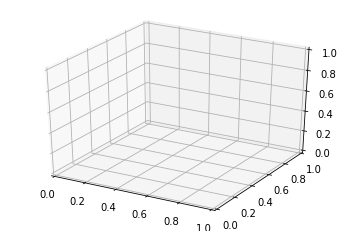

In [367]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(t, fft.fftshift(f), fft.fftshift(Sxx, axes=0), cmap=cm.coolwarm)

In [ ]:
def get_stft_psd(sig, fs):
    f, t, psd = signal.stft(sig, fs, window='hann', nperseg=1024, noverlap=0, nfft=1024, detrend=False, return_onesided=False)
    f = fft.fftshift(f)
    psd = fft.fftshift(psd, axes=0)
    psd = np.abs(psd)**2.
    return f, t, psd

def get_power_from_stft(psd, f, t):
    return np.sum(psd)

def get_energy_from_stft(psd, f, t):
    dt = t[-1] - t[0]
    return np.sum(psd) * dt
    

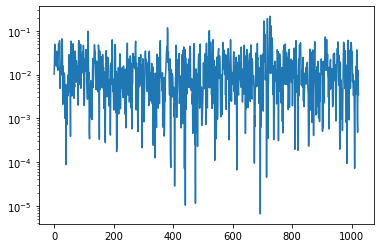

16.321772176417905


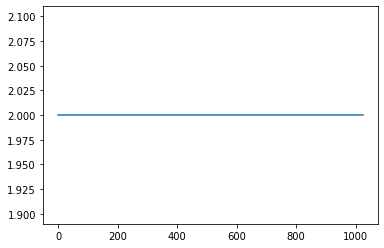

4.0


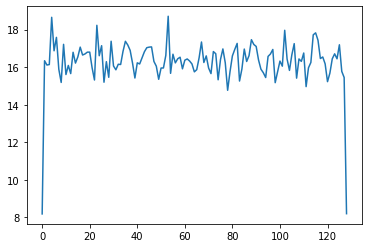

In [405]:
f, t, psd = get_stft_psd(both, fs) 

# plt.pcolormesh(t, f, psd, shading='gouraud', norm=mpl.colors.LogNorm(vmin=np.min(Sxx), vmax=np.max(Sxx)))
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# print('Signal energy from stft %8.6f' % (get_energy_from_stft(psd, f, t)))
# print('Signal energy corr from stft %8.6f' % (get_energy_from_stft(psd, f, t)*(1.63**2)))
# print('Signal power from stft %8.6f' % (get_power_from_stft(psd, f, t)))
# print('Signal power corr from stft %8.6f' % (get_power_from_stft(psd, f, t)*(1.63)))

plt.semilogy(psd[:, 100])
plt.show()

print(np.sum(psd[:, 100]))

w = 2*signal.get_window('box', 1024)
plt.plot(w)
plt.show()
print(np.sum(np.abs(w)**2) / 1024)

g = np.sum(psd, axis=0)
plt.plot(g)
plt.show()

In [ ]:
N = 1024
window = signal.hann(N)
# window = np.concatenate((window, np.zeros(100)), axis=0)
# window = np.concatenate((np.zeros(100), window), axis=0)

plt.plot(window)
plt.show()

response = fft.fftshift(fft.fft(window)) #/ (len(window)/2.0)
# freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(response / abs(response).max())
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.plot(response)
# plt.plot(np.abs(response))
plt.show()

# x = fft.fftshift(fft.fft(window))
# plt.plot(x)
# plt.show()

print(np.sum(np.abs(window)**2))
print(np.sum(np.abs(response)**2)/N)